In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm


plt.style.use('dark_background')

In [2]:
model_name = 'pos_Model7' 

In [3]:
df = pd.read_csv('training_Vessel_data.csv')
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())
tf.config.list_physical_devices()

['/device:CPU:0']


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
#adding GPU support
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

[]

In [5]:
import pandas as pd

def zscore_normalize(df):
  # create a copy of the dataframe
  df_normalized = df.copy()
  # loop over each column
  for column in df_normalized.columns:
    # calculate the mean and standard deviation of the column
    mean = df_normalized[column].mean()
    std = df_normalized[column].std()
    # subtract the mean and divide by the standard deviation
    df_normalized[column] = (df_normalized[column] - mean) / std
  # return the normalized dataframe
  return df_normalized

df = zscore_normalize(df)
df.describe()

,Speed,G-Force,Altitude (Sea Level),Altitude (Ground),Pressure,Mass,Thrust,atmospheric_density,Position1,Position2,...,Lift1,Lift2,Lift3,Orientation1,Orientation2,Orientation3,Angular Velocity1,Angular Velocity2,Angular Velocity3,Time
count,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,...,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04,1.177100e+04
mean,1.448732e-16,-2.173098e-17,5.794928e-17,4.829107e-17,4.829107e-17,2.076516e-16,8.692393e-17,7.243661e-18,-3.380375e-17,5.794928e-17,...,2.414554e-18,1.328004e-17,-9.658214e-18,-5.312018e-17,-7.726571e-17,-1.931643e-17,3.621830e-18,-9.658214e-18,-1.207277e-18,1.062404e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.214937e+00,-3.058662e-01,-1.371349e+00,-1.365645e+00,-3.666172e-01,-3.662593e+00,-2.817389e-01,-3.828765e-01,-2.396485e+00,-2.442672e+00,...,-3.017621e+01,-1.564939e+01,-1.142693e+00,-3.340506e+00,-2.346355e+00,-2.018410e+00,-7.029834e-01,-3.427629e+01,-3.429261e+01,-1.515680e+00
25%,-4.290002e-01,-3.057653e-01,-8.408653e-01,-8.444966e-01,-3.666172e-01,-1.852376e-01,-2.817389e-01,-3.828765e-01,-4.326808e-01,-1.406658e-01,...,7.579834e-02,-4.934357e-02,-7.865173e-02,-5.992973e-01,-8.687593e-01,-8.525903e-01,-3.090349e-02,2.690214e-02,2.898013e-02,-8.632950e-01
50%,1.012342e-01,-3.057035e-01,-2.238583e-02,-2.245889e-02,-3.666172e-01,-1.852376e-01,-2.817389e-01,-3.828765e-01,-2.201871e-01,-1.198823e-01,...,7.579834e-02,-4.934357e-02,-7.865156e-02,1.143471e-01,3.088933e-03,-1.501046e-01,-3.078359e-02,3.012224e-02,2.899553e-02,-1.131957e-01
75%,7.060107e-01,-3.017168e-01,5.807624e-01,5.791531e-01,-3.611275e-01,-1.852376e-01,-2.817389e-01,-3.769848e-01,7.548405e-01,4.456432e-01,...,7.579834e-02,-4.934357e-02,-7.865156e-02,7.910016e-01,8.817373e-01,1.052541e+00,-2.629193e-02,3.247535e-02,2.944570e-02,7.633571e-01
max,1.759666e+00,6.289609e+00,2.728619e+00,2.726524e+00,4.048050e+00,5.568720e+00,3.790797e+00,4.181584e+00,2.066715e+00,2.330457e+00,...,2.126295e+00,1.506589e+01,2.885012e+01,1.573321e+00,2.150270e+00,1.707334e+00,3.426934e+01,8.486506e-01,9.922022e-02,2.533706e+00


In [6]:
# Define the features and labels
data1Y = df[['Position1', 'Position2', 'Position3']]
data1X = df[['Speed', 'Pressure', 'Mass', 'Thrust', 'atmospheric_density', 'Orientation1', 'Orientation2', 'Orientation3', 'Time']]
data1X 

,Speed,Pressure,Mass,Thrust,atmospheric_density,Orientation1,Orientation2,Orientation3,Time
0,-3.214937,3.997738,5.568720,-0.281739,3.731189,0.781102,0.129455,0.102613,-1.515680
1,-3.214937,3.997738,5.568720,-0.281739,3.731186,0.781102,0.129455,0.102613,-1.512806
2,-3.214937,3.997738,5.568720,-0.281739,3.731184,0.781102,0.129455,0.102613,-1.509932
3,-3.214937,3.997738,5.568720,-0.281739,3.731181,0.781102,0.129455,0.102613,-1.507058
4,-3.214937,3.997738,5.568720,-0.281739,3.731178,0.781102,0.129455,0.102613,-1.504184
...,...,...,...,...,...,...,...,...,...
11766,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.470480
11767,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.473354
11768,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.476228
11769,1.633297,1.648448,-3.662593,-0.281739,1.849471,-2.161178,-1.815758,1.421581,2.479101


In [7]:
# we will have a 80-20 split for training and testing
x_train, x_test, y_train, y_test = train_test_split(data1X, data1Y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9416, 9) (2355, 9) (9416, 3) (2355, 3)


In [8]:
# creating the sequential model, with 5 layers, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 3, input shape is 9
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(9,)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(3, activation='linear')
])

# compiling the model, using the adam optimizer and mean squared error loss function, and accuracy as the metric, with patience of 100, epochs of 1000
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [9]:
# New Model 1
inputs = tf.keras.Input(shape=(9,))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

# Model 2 (previously model 1)
x1 = tf.keras.layers.Reshape((1, 64))(x)  # Reshape the input to have a third dimension
# x1 = tf.keras.layers.LSTM(512, activation='relu', return_sequences=True)(x1)
x1 = tf.keras.layers.LSTM(256, activation='relu', return_sequences=True)(x1)
x1 = tf.keras.layers.LSTM(128, activation='relu', return_sequences=True)(x1)
x1 = tf.keras.layers.LSTM(64, activation='relu')(x1)
output1 = tf.keras.layers.Dense(3, activation='linear')(x1)

# Model 3 (previously model 2)
x2 = tf.keras.layers.Reshape((1, 64))(x)  # Reshape the input to have a third dimension
# x2 = tf.keras.layers.LSTM(512, activation='relu', return_sequences=True)(x2)
x2 = tf.keras.layers.LSTM(256, activation='relu', return_sequences=True)(x2)
x2 = tf.keras.layers.LSTM(128, activation='relu', return_sequences=True)(x2)
x2 = tf.keras.layers.LSTM(64, activation='relu')(x2)
output2 = tf.keras.layers.Dense(3, activation='linear')(x2)

# Concatenate the outputs of the two models
concatenated = tf.keras.layers.concatenate([output1, output2])

# Model 4
out = tf.keras.layers.Dense(128, activation='relu')(concatenated)
out = tf.keras.layers.Dense(64, activation='relu')(out)
out = tf.keras.layers.Dense(32, activation='relu')(out)
out = tf.keras.layers.Dense(3, activation='linear')(out)

# Create the final model
final_model = tf.keras.models.Model(inputs=inputs, outputs=out)

# Compile the final model
final_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 9)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 256)                  2560      ['input_1[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 128)                  32896     ['dense_9[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 64)                   8256      ['dense_10[0][0]']            
                                                                                              

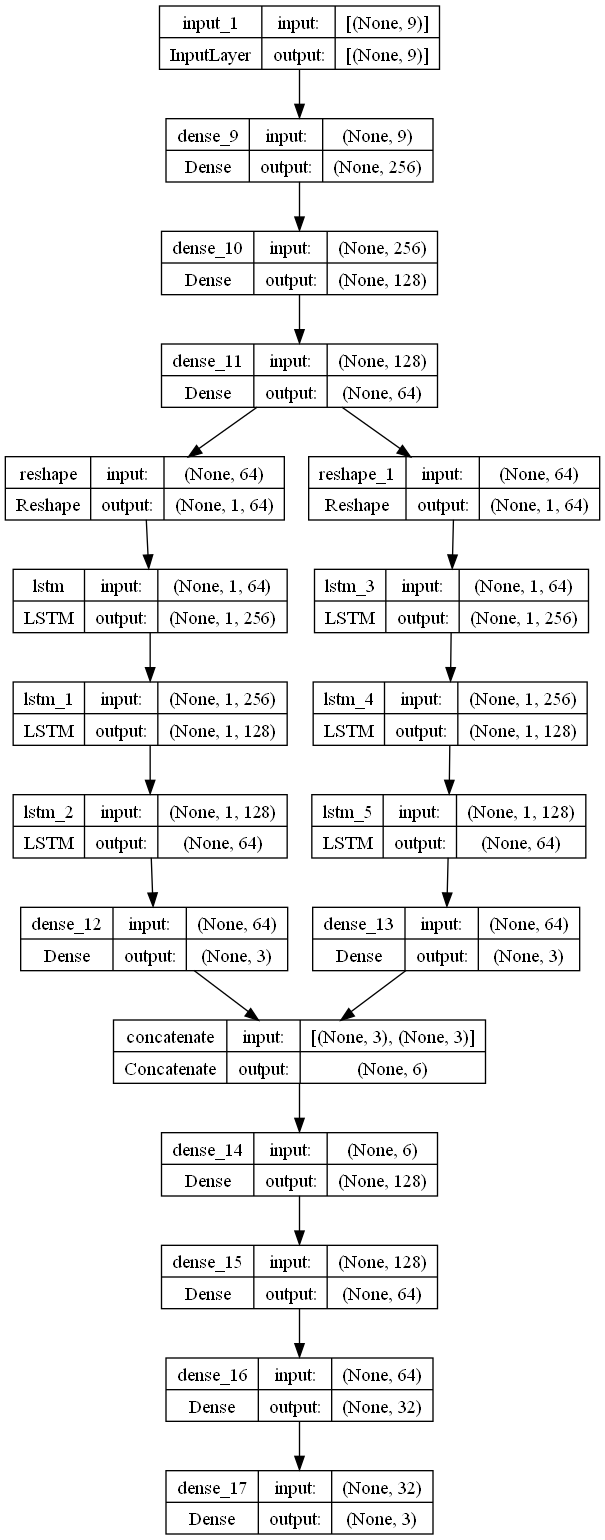

In [10]:
# describing and visualizing the model
final_model.summary()
tf.keras.utils.plot_model(final_model, to_file='model.png', show_shapes=True)

In [11]:
import time
for i in tqdm(range(100)):
    time.sleep(0.00001)
    

100%|██████████| 100/100 [00:00<00:00, 127.36it/s]


In [35]:
from tqdm import tqdm

history_n = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
                      epochs=100, batch_size=64, 
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=99)])

Epoch 1/100
148/148 [==============================] - 1s 4ms/step - loss: 0.7603 - accuracy: 0.6770 - val_loss: 0.5218 - val_accuracy: 0.8102
Epoch 2/100
148/148 [==============================] - 0s 3ms/step - loss: 0.3722 - accuracy: 0.8426 - val_loss: 0.2532 - val_accuracy: 0.8926
Epoch 3/100
148/148 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.8509 - val_loss: 0.1274 - val_accuracy: 0.8229
Epoch 4/100
148/148 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.8349 - val_loss: 0.0914 - val_accuracy: 0.8497
Epoch 5/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.8757 - val_loss: 0.0689 - val_accuracy: 0.8998
Epoch 6/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9219 - val_loss: 0.0510 - val_accuracy: 0.9499
Epoch 7/100
148/148 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9473 - val_loss: 0.0681 - val_accuracy: 0.7851

KeyboardInterrupt: 

In [12]:
history = final_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=100, verbose=1, batch_size=64,)


Epoch 1/100


148/148 [==============================] - 7s 12ms/step - loss: 0.5143 - accuracy: 0.6416 - val_loss: 0.1901 - val_accuracy: 0.8454
Epoch 2/100
148/148 [==============================] - 1s 8ms/step - loss: 0.0600 - accuracy: 0.8892 - val_loss: 0.0518 - val_accuracy: 0.8994
Epoch 3/100
148/148 [==============================] - 1s 8ms/step - loss: 0.0169 - accuracy: 0.9521 - val_loss: 0.0121 - val_accuracy: 0.9749
Epoch 4/100
148/148 [==============================] - 1s 7ms/step - loss: 0.0083 - accuracy: 0.9667 - val_loss: 0.0057 - val_accuracy: 0.9779
Epoch 5/100
148/148 [==============================] - 1s 7ms/step - loss: 0.0112 - accuracy: 0.9701 - val_loss: 0.1067 - val_accuracy: 0.9359
Epoch 6/100
148/148 [==============================] - 1s 7ms/step - loss: 0.0258 - accuracy: 0.9334 - val_loss: 0.0060 - val_accuracy: 0.9507
Epoch 7/100
148/148 [==============================] - 1s 7ms/step - loss: 0.0029 - accuracy: 0.9750 - val_loss: 0.0011 - val_accuracy: 0.9

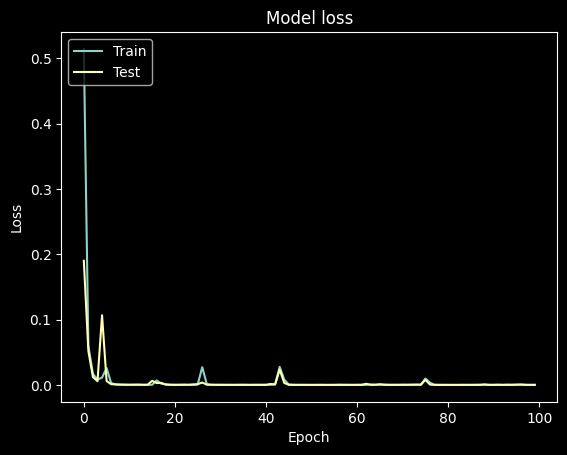

In [13]:
# plotting the loss and accuracy of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# plotting the loss and accuracy of the model
plt.plot(history_n.history['loss'])
plt.plot(history_n.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
# evaluating the model
final_model.evaluate(x_test, y_test)

74/74 [==============================] - 0s 3ms/step - loss: 1.4339e-04 - accuracy: 0.9966


[0.00014338963956106454, 0.9966029524803162]

In [15]:
model.evaluate(x_test, y_test)

NameError: name 'model' is not defined

In [15]:
# predictons of the model
predictions = final_model.predict(x_test)

74/74 [==============================] - 1s 2ms/step


In [17]:
predictions_n = model.predict(x_test)

NameError: name 'model' is not defined

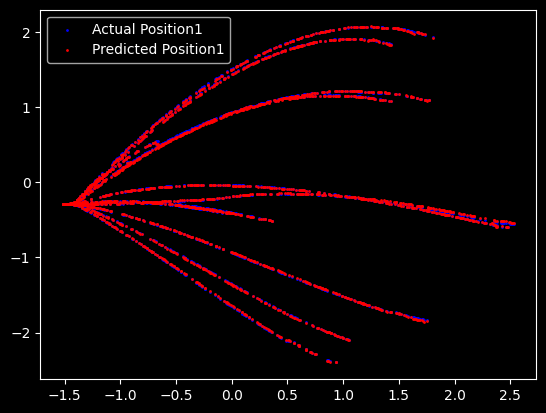

In [16]:
# plotting the predictions with the actual values, scatter plot using the time as a sudo place holder
time = np.arange(0, len(predictions))
plt.scatter(x_test['Time'], y_test['Position1'], label='Actual Position1', s=1, c='b')
plt.scatter(x_test['Time'], predictions[:,0], label='Predicted Position1', s= 1, c='r')
plt.legend()

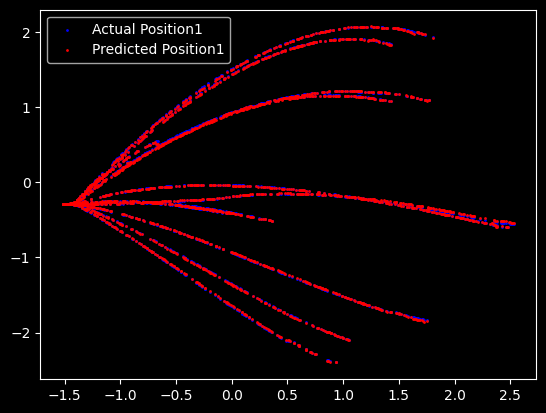

In [17]:
# plotting the predictions with the actual values, scatter plot using the time as a sudo place holder
time = np.arange(0, len(predictions))
plt.scatter(x_test['Time'], y_test['Position1'], label='Actual Position1', s=1, c='b')
plt.scatter(x_test['Time'], predictions[:,0], label='Predicted Position1', s= 1, c='r')
plt.legend()

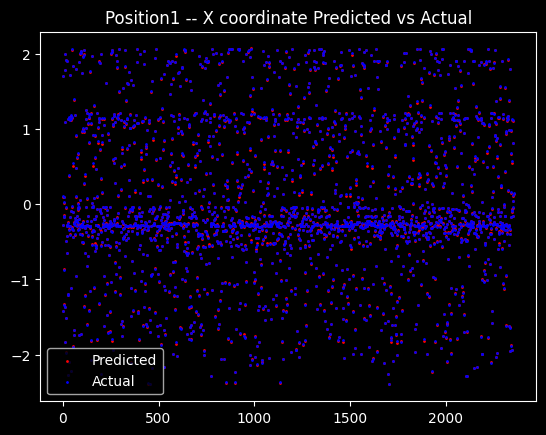

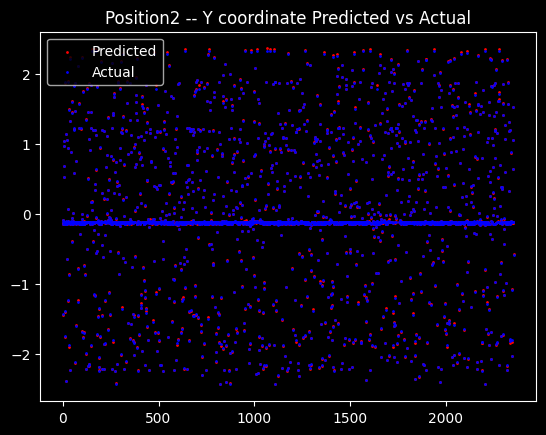

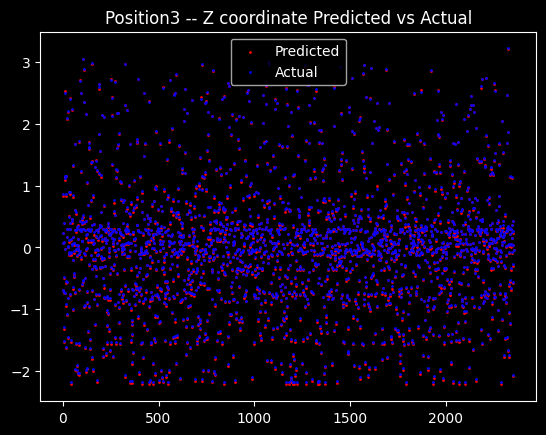

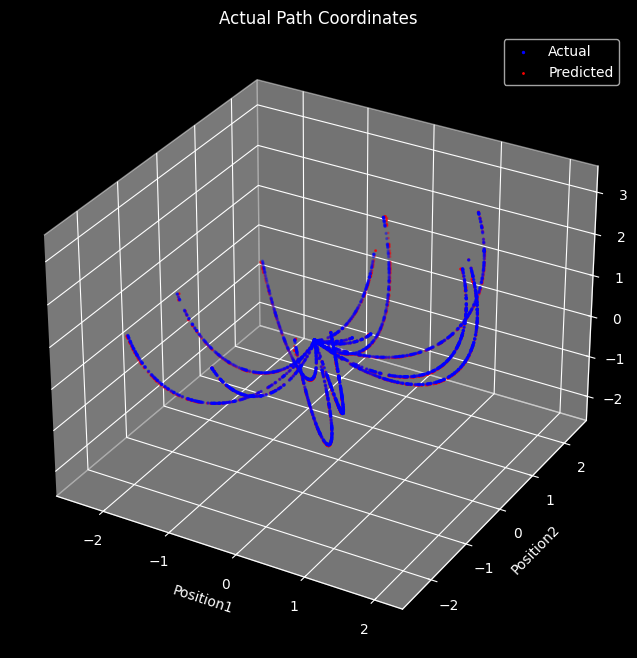

In [18]:
time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,0], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,0], s=1, label='Actual', color='blue')
plt.title(f"Position1 -- X coordinate Predicted vs Actual")
plt.legend()
plt.show()

time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,1], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,1], s=1, label='Actual', color='blue')
plt.title(f"Position2 -- Y coordinate Predicted vs Actual")
plt.legend()
plt.show()

time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,2], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,2], s=1, label='Actual', color='blue')
plt.title(f"Position3 -- Z coordinate Predicted vs Actual")
plt.legend()

fig = plt.figure(dpi=100, figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_test['Position1'], y_test['Position2'], y_test['Position3'], s=2, color='b', label='Actual')
ax.set_xlabel('Position1')
ax.set_ylabel('Position2')
ax.set_zlabel('Position3')
plt.title("Actual Path Coordinates")

# ax = fig.add_subplot(111, projection='3d')
ax.scatter(predictions[:,0], predictions[:,1], predictions[:,2], s=1, color='r', label='Predicted')
ax.set_xlabel('Position1')
ax.set_ylabel('Position2')
ax.set_zlabel('Position3')
plt.title("Actual Path Coordinates")
plt.legend()

plt.show()

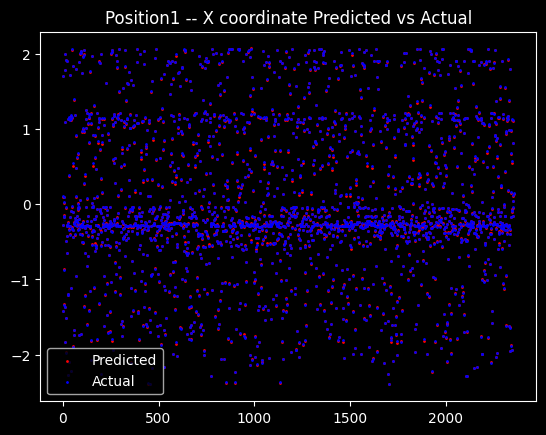

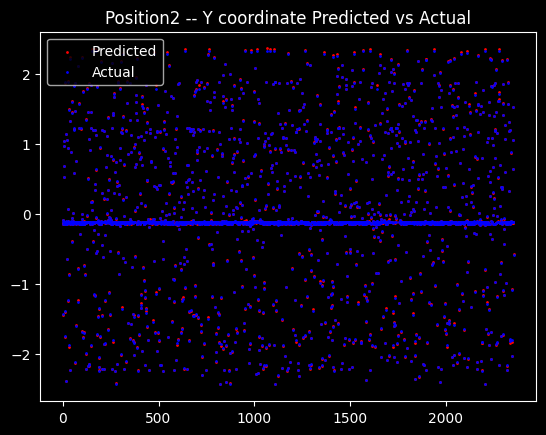

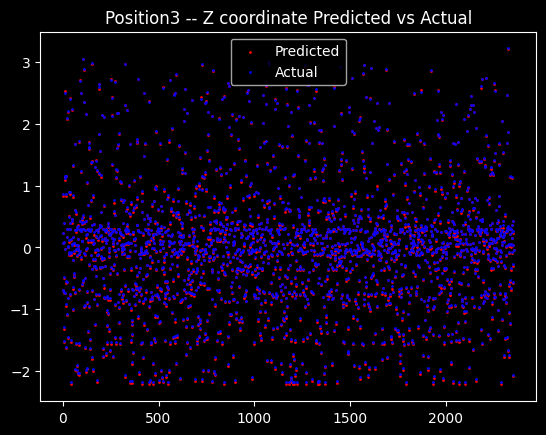

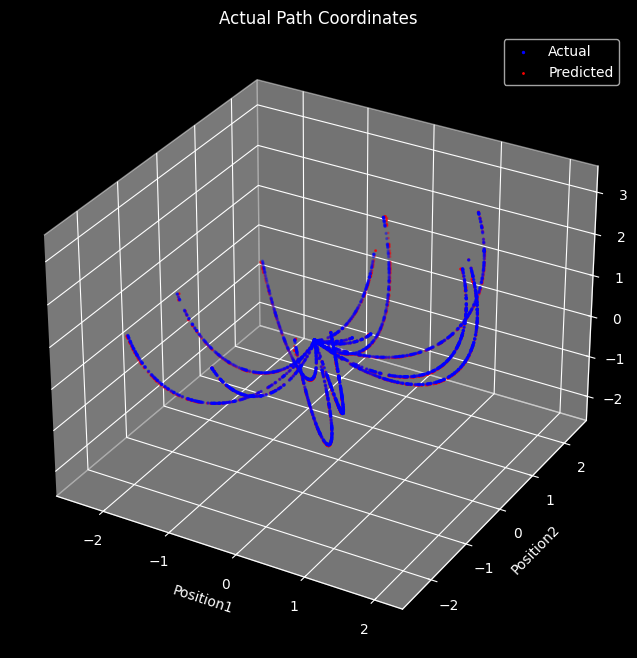

In [19]:
time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,0], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,0], s=1, label='Actual', color='blue')
plt.title(f"Position1 -- X coordinate Predicted vs Actual")
plt.legend()
plt.show()

time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,1], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,1], s=1, label='Actual', color='blue')
plt.title(f"Position2 -- Y coordinate Predicted vs Actual")
plt.legend()
plt.show()

time = np.arange(0, predictions[:,0].shape[0]).reshape(-1, 1)
plt.scatter(time, predictions[:,2], s=1, label='Predicted', color='red')
plt.scatter(time, y_test.to_numpy()[:,2], s=1, label='Actual', color='blue')
plt.title(f"Position3 -- Z coordinate Predicted vs Actual")
plt.legend()

fig = plt.figure(dpi=100, figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_test['Position1'], y_test['Position2'], y_test['Position3'], s=2, color='b', label='Actual')
ax.set_xlabel('Position1')
ax.set_ylabel('Position2')
ax.set_zlabel('Position3')
plt.title("Actual Path Coordinates")

# ax = fig.add_subplot(111, projection='3d')
ax.scatter(predictions[:,0], predictions[:,1], predictions[:,2], s=1, color='r', label='Predicted')
ax.set_xlabel('Position1')
ax.set_ylabel('Position2')
ax.set_zlabel('Position3')
plt.title("Actual Path Coordinates")
plt.legend()

plt.show()

In [20]:
# saving model 
final_model.save(f'{model_name}.h5')

c:\Users\LENOVO\.conda\envs\cuda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save(f'{model_name}.h5')